# Ride Sharing Data Analysis Using Data from Uber Technologies, Inc.

Uber provides different services that include ride-sharing, food delivery, package delivery, couriers, freight transporation and through a partnership with Lime, electric bicycle and motorized scooter rental. 

In this project, we will mainly use the data regarding `Uber ride`

We will be exploring the following topics and addressing the following questions:
* Check how long do people travel with Uber?
* What hour do most poeple take uber to thier destination (peak hours)?
* Check the purpose of trips (Most common destinantions)?
* Which day has the highest number of trips?
* What are the number of trips per day, on average?
* What are the trips in the month?
* The starting points of trips. Where do people start boarding their trip from most?

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [5]:
data=pd.read_csv('Uber Drives - .csv')
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


## Check for Missing Values

In [7]:
data.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [9]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

Although dropping a value from your dataset should be the last resort, we are dropping all the NaN, or unavailable data in our dataset, for the purpose of this project.

In [61]:
data=data.dropna()

In [65]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
HOUR           0
DAY            0
DAY_OF_WEEK    0
MONTH          0
WEEKDAY        0
dtype: int64

In [15]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format="%m/%d/%Y %H:%M")
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format="%m/%d/%Y %H:%M")

In [17]:
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]
for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
data['HOUR']=hour
data['DAY']=day
data['DAY_OF_WEEK']=dayofweek
data['MONTH']=month
data['WEEKDAY']=weekday

In [19]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


# Categories We Have

In [21]:
data['CATEGORY*'].value_counts()

CATEGORY*
Business    647
Personal      6
Name: count, dtype: int64

<Axes: xlabel='CATEGORY*', ylabel='count'>

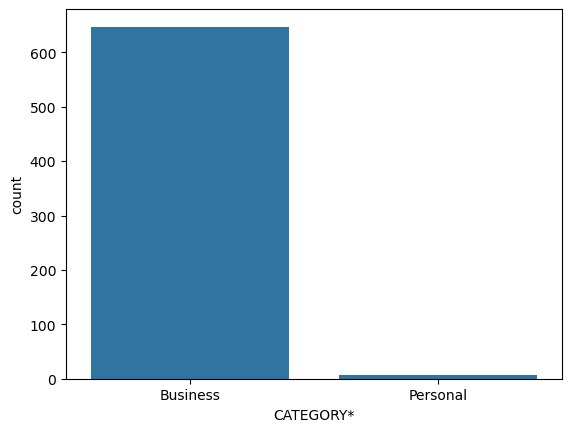

In [23]:
sns.countplot(x='CATEGORY*',data=data)

We have larger number of business rides category as against very few personal rides.

# How long do people travel with Uber?

<Axes: ylabel='Frequency'>

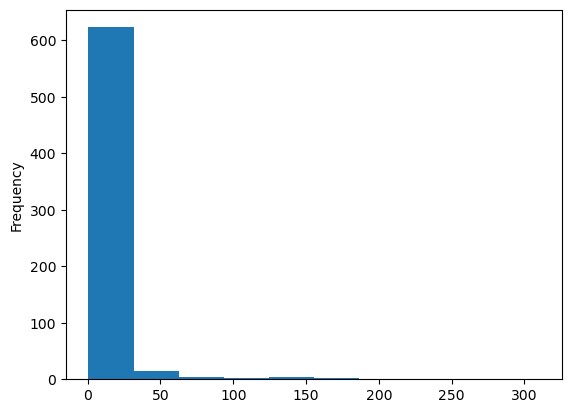

In [25]:
data['MILES*'].plot.hist()

Mostly people travel for a short distance with Uber.

## What hour do most people take Uber to their destination?

Text(0.5, 1.0, 'Number of trips Vs hours')

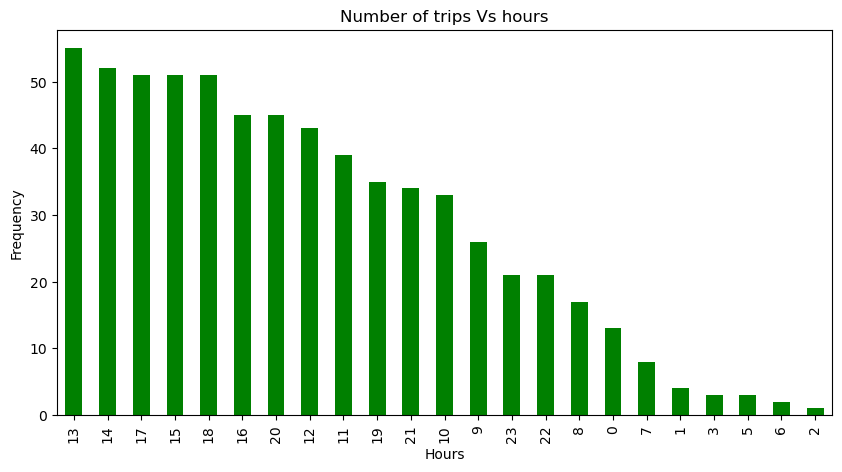

In [35]:
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar',color='green',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips Vs hours')

As we can see most people take Uber to their destination around the 13th hour (1pm) and the least hour is 2am.

# Check The Purpose of Trips

<Axes: xlabel='PURPOSE*'>

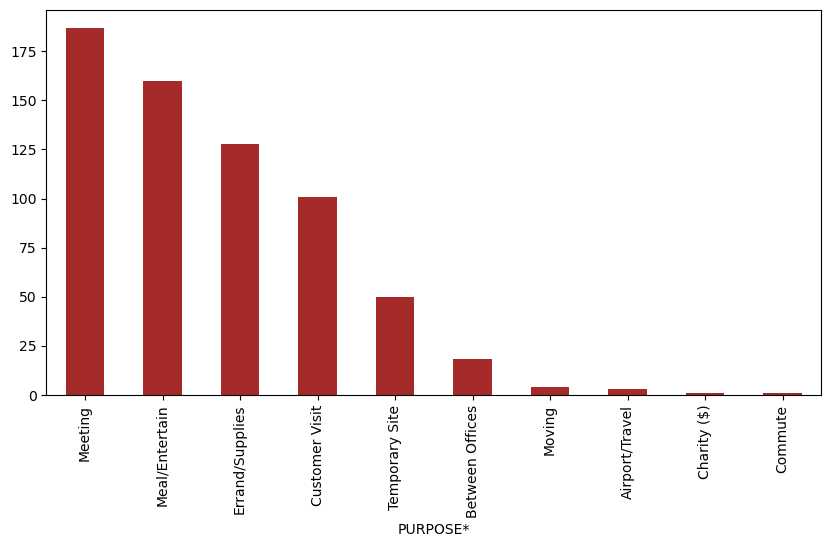

In [37]:
data['PURPOSE*'].value_counts().plot(kind='bar',figsize=(10,5),color='brown')

We can see that the most common purpose of the trip is meeting and meal/entertain.

## Which day has the highest number of Trips?

<Axes: xlabel='WEEKDAY'>

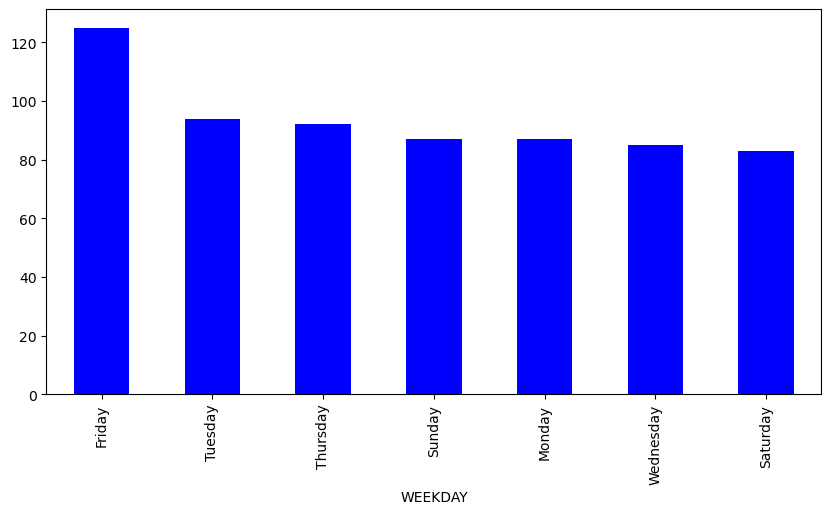

In [39]:
data['WEEKDAY'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

Friday has the highest number of Trips.

## What are the number of trips per day?

<Axes: xlabel='DAY'>

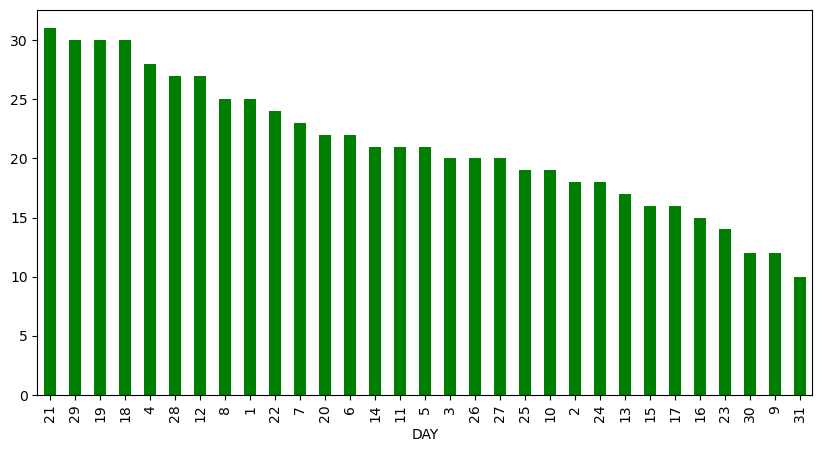

In [90]:
data['DAY'].value_counts().plot(kind='bar',figsize=(10,5),color='green')

The days are numbered from 1 to 31 and are displayed no the x-axis. The number of trips varied for different days. The day that had the highest number of trips was the 21st day and the day that had the lowest number of trips was the 31st day. This can indicated many things but also may vary from month to month so through further analysis, we may be able to understand the reasons behind the highest and lowest trips per day.

<Axes: xlabel='MONTH'>

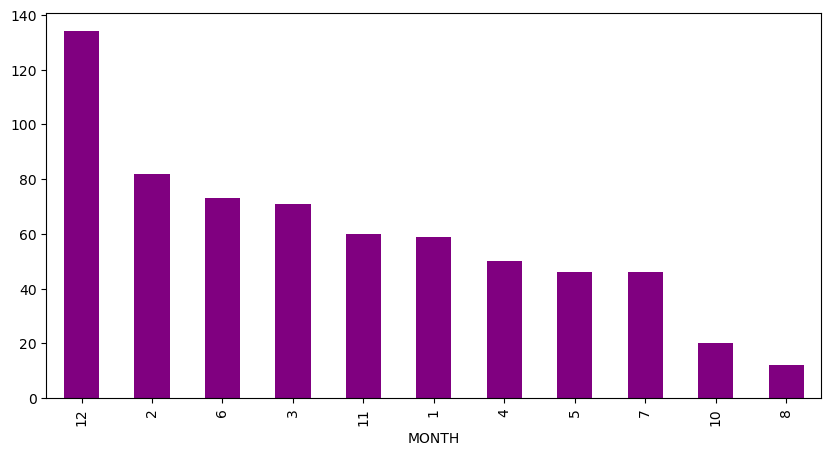

In [51]:
data['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='purple')

The months are numbered from 1 to 12 and are displayed on the x-axis. The month that has the highest number of trips is the 12th month, decemeber. This may be due to the numerous holidays and breaks and because people travel during this time of the year. The month with the lowest number of trips is the 8th month, August. The reason for this may be from the extreme weathers discouraging people from traveling. Another reason might be because students are on break from school during that time.

## The starting points of trips. Where do pople start their trip from the most?

<Axes: xlabel='START*'>

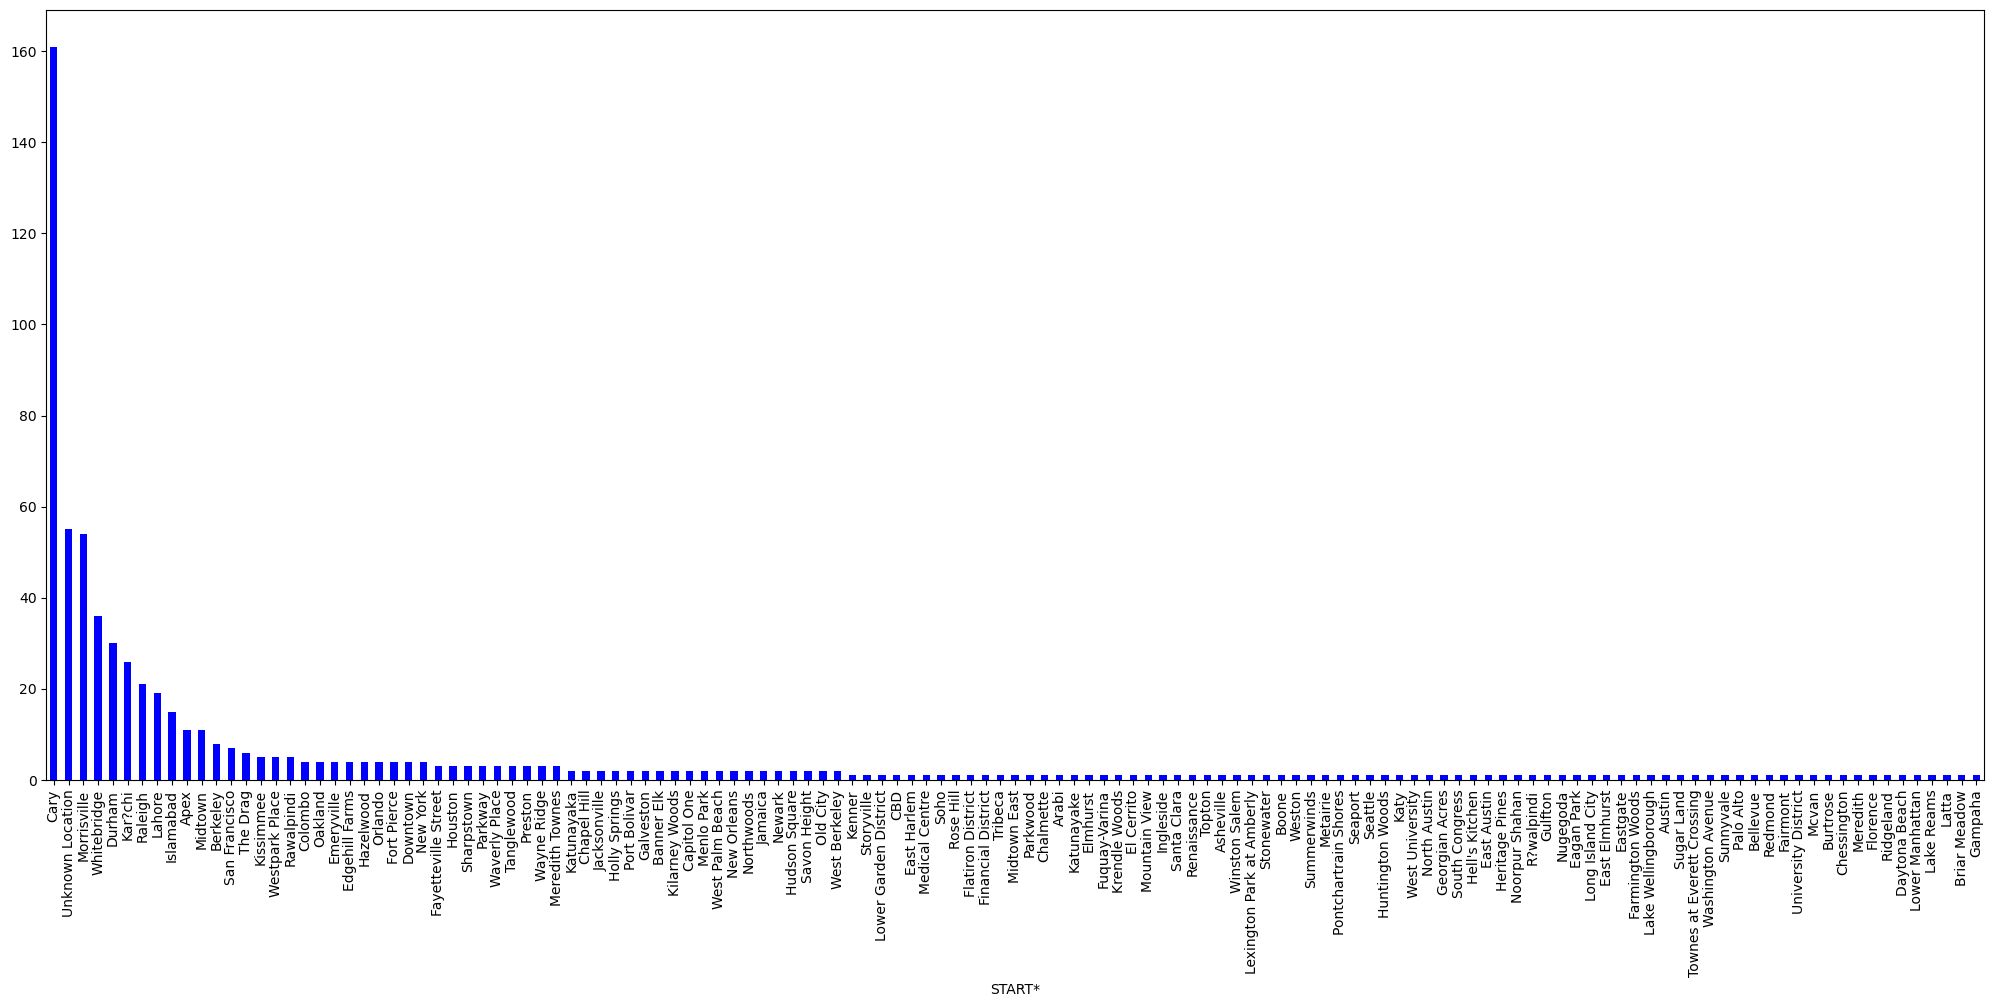

In [53]:
data['START*'].value_counts().plot(kind='bar',figsize=(25,10),color='blue')

Most people in this dataset start their journey from *Cary* followed by som unknown location, followed by Morrisville.